# Diyabet Tahminleme Projesi

Bu projede bireylerin sağlık verilerine bakılarak diyabet hastası olup olmadığını tahmin edebilecek modeli kurmak amaçlanmıştır.

## Değişkenlerin Tanımlanması

* Pregnancies: daha önce geçirilen hamilelik sayısı
* Glucose: kan şekeri
* BloodPressure: kan basıncı
* SkinThickness: deri kalınlığı
* Insulin: insülin seviyesi
* BMI: vücut-kitle endeksi
* DiabetesPedigree: soysal yatkınlık
* Age: yaş
* Outcome: sonuç

In [1]:
#Kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings('ignore')

## Verilerin Okutulması

In [2]:
df = pd.read_csv("diabetes.csv",sep=",")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Korelasyon derecesi, bağımlı ve bağımsız değişken arasındaki ilişkinin gücünü açıklamaktadır. İncelediğimiz değişken olan sonuç (Outcome) değişkeninin diğer değişkenler ile arasındaki korelasyon incelendi. 

In [3]:
df.corr()["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

Verideki boş değerler incelendi. Boş veri bulunmadığı görüldü.

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Değişkenlerin istatistiksel özellikleri incelendi.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Değişkenlerin veri tipleri incelendi. Hepsinin sayısal olduğu görüldü.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(768, 9)

Diyabet hastası olan ve olmayan bireylerin histogramı çizildi.

0    500
1    268
Name: Outcome, dtype: int64


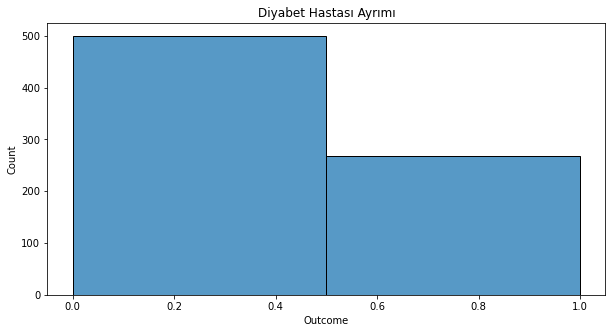

In [8]:
print(df.Outcome.value_counts())
plt.figure(figsize=(10, 5))
sns.histplot(data=df.Outcome, bins = 2)
plt.title("Diyabet Hastası Ayrımı")
plt.show()

Bağımsız değişkenlerin histogram grafikleri çizildi.

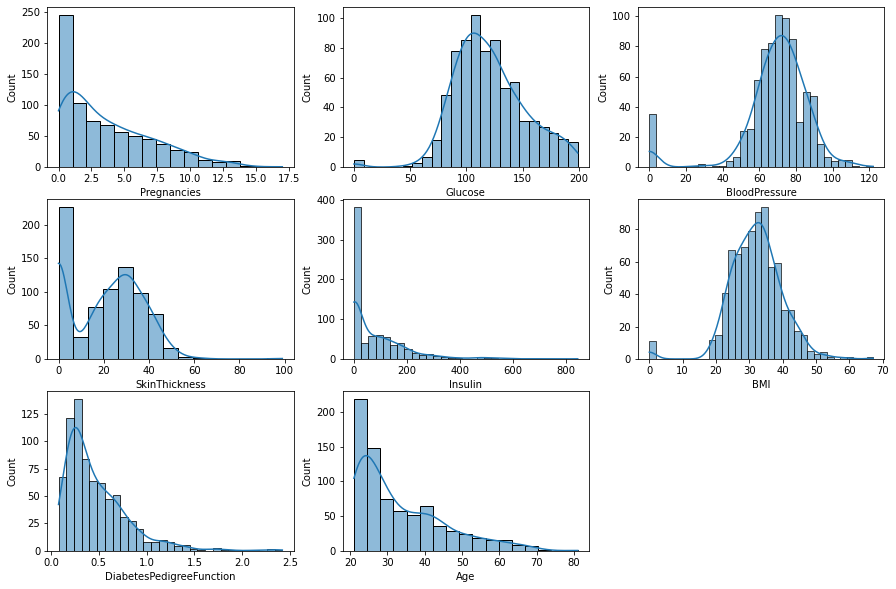

In [9]:
plt.figure(figsize=(15, 10))
plt.subplot(3,3,1)
sns.histplot(data=df,x="Pregnancies",kde=True)
plt.subplot(3,3,2)
sns.histplot(data=df,x="Glucose",kde=True)
plt.subplot(3,3,3)
sns.histplot(data=df,x="BloodPressure",kde=True)
plt.subplot(3,3,4)
sns.histplot(data=df,x="SkinThickness",kde=True)
plt.subplot(3,3,5)
sns.histplot(data=df,x="Insulin",kde=True)
plt.subplot(3,3,6)
sns.histplot(data=df,x="BMI",kde=True)
plt.subplot(3,3,7)
sns.histplot(data=df,x="DiabetesPedigreeFunction",kde=True)
plt.subplot(3,3,8)
sns.histplot(data=df,x="Age",kde=True)
plt.show()

Veri seti diyabet hastası olma ve olmama durumuna göre ikiye ayrıldı. Bu grupların bağımsız değişkenlere göre oranı hesaplandı.

In [10]:
diabetes = df[df.Outcome>0]
nondiabetic = df[df.Outcome<1]

In [11]:
dfdiabetes = pd.DataFrame(diabetes.mean(),columns=["1"])
dfnondiabetic = pd.DataFrame(nondiabetic.mean(),columns=["0"])
dff = pd.concat([dfdiabetes,dfnondiabetic],axis=1).T
dff

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0


### Aykırı Değişkenlerin Box Plot Yöntemi ile Belirlenmesi

Aykırı değerler (outlier), diğer değerlerle karşılaştırıldığında veri setine uygun olmayan değerlerdir. Bu değerlerin fazla olması, veri setinin normal dağılımdan sapmasına, bu nedenle elde edilen istatistiksel sonuçlarda farklılıklara neden olabilmektedir.

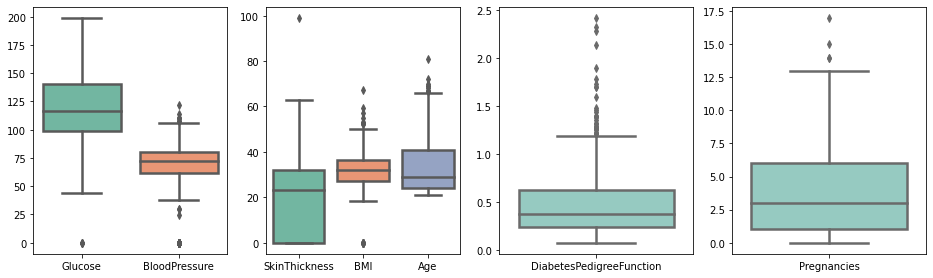

In [12]:
plt.figure(figsize=(16, 10))
plt.subplot(2,4,1)
sns.boxplot(data = df.drop(["Insulin","DiabetesPedigreeFunction","Pregnancies","Outcome","SkinThickness","BMI","Age"],axis=1), orient = 'v', palette = 'Set2', linewidth = 2.5 )
plt.subplot(2,4,2)
sns.boxplot(data = df.drop(["Insulin","DiabetesPedigreeFunction","Pregnancies","Outcome","Glucose","BloodPressure"],axis=1), orient = 'v', palette = 'Set2', linewidth = 2.5 )
plt.subplot(2,4,3)
sns.boxplot(data = df.drop(["Insulin","Pregnancies","Outcome","SkinThickness","BMI","Age","Glucose","BloodPressure"],axis=1), orient = 'v', palette = 'Set3', linewidth = 2.5 )
plt.subplot(2,4,4)
sns.boxplot(data = df.drop(["Insulin","DiabetesPedigreeFunction","Outcome","SkinThickness","BMI","Age","Glucose","BloodPressure"],axis=1), orient = 'v', palette = 'Set3', linewidth = 2.5 )
plt.show()

## Bağımlı ve Bağımsız Değişkenlerin Ayrılması

In [13]:
x = df.drop(["Outcome"],axis=1) 
y = df.Outcome
x = sm.add_constant(x)
print("y veri seti")
print(y.head())
x.head()

y veri seti
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


,const,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,6,148,72,35,0,33.6,0.627,50
1,1.0,1,85,66,29,0,26.6,0.351,31
2,1.0,8,183,64,0,0,23.3,0.672,32
3,1.0,1,89,66,23,94,28.1,0.167,21
4,1.0,0,137,40,35,168,43.1,2.288,33


## İstatistiksel Model - 1

Modelimizi son haline getirirken "Outcome" değerine etki etmeyen veya etkisi az olan parametrelerin çıkartılması gerekmektedir. 
Bütün parametrelerin olduğu bir model oluşturup, bu modelden  "p" değeri "0,05"in üstünde olanları çıkartacağız.
"p" değeri "0,05"in üstünde herhangi bir değer kalmadığında bu bizim öğrenme modellerimizi için kullanacağımız veri seti olacaktır.

In [14]:
lm = sm.OLS(y,x)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           7.36e-55
Time:                        21:45:02   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8539      0.085     -9.989      0.000      -1.022      -0.686
Pregnancies                  0.0206      0.005      4.014      0.000       0.011       0.031
Glucose                      0.0059      0.001     11.493      0.000       0.005       0.007
BloodPressure               -0.0023      0.001     -2.873      0.004      -0.004      -0.001
SkinThickness                0.0002      0.001      0.139      0.890      -0.002       0.002
Insulin                     -0.0002      0.000     -1.205      0.229      -0.000       0.000
BMI                          0.0132      0.002      6.344      0.000       0.009       0.017
DiabetesPedigreeFunction     0.1472      0.045      3.268      0.001       0.059       0.236
Age                          0.0026      0.002      1.693      0.091      -0.000       0.006
==============================================================================
Omnibus:                       41.539   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.183
Skew:                           0.395   Prob(JB):                     1.69e-07
Kurtosis:                       2.408   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Least Squares (en küçük kareler) yöntemi kullanılarak, değişkenlerin kovaryans dereceleri ölçüldü. Anlamlılık düzeyi 0.05'in üzerinde olan değerler veri setinden çıkarıldı.

In [15]:
x = df.drop(["Outcome","SkinThickness","Insulin"],axis=1) 
y = df.Outcome
x = sm.add_constant(x)

## İstatistiksel Model - 2

In [16]:
lm = sm.OLS(y,x)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     54.82
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           2.92e-56
Time:                        21:45:02   Log-Likelihood:                -382.72
No. Observations:                 768   AIC:                             779.4
Df Residuals:                     761   BIC:                             811.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8363      0.084     -9.919      0.000      -1.002      -0.671
Pregnancies                  0.0209      0.005      4.086      0.000       0.011       0.031
Glucose                      0.0057      0.000     11.815      0.000       0.005       0.007
BloodPressure               -0.0024      0.001     -2.940      0.003      -0.004      -0.001
BMI                          0.0131      0.002      6.662      0.000       0.009       0.017
DiabetesPedigreeFunction     0.1403      0.044      3.160      0.002       0.053       0.227
Age                          0.0028      0.002      1.822      0.069      -0.000       0.006
==============================================================================
Omnibus:                       40.153   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.102
Skew:                           0.386   Prob(JB):                     2.91e-07
Kurtosis:                       2.413   Cond. No.                         877.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
x = df.drop(["Outcome","SkinThickness","Insulin"],axis=1) 
y = df.Outcome

## Veri Kaynağının Eğitim ve Test Kümelerine Ayrılması

Tahminleme aşamasına geçerken, veri setinin %80'i modelin training verisi olarak, %20'si test verisi olarak kullanılmak üzere, veri seti iki gruba ayrıldı.

In [18]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20,random_state=0)

## Öznitelik(Değişken) Ölçekleme 

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

#sc.inverse_transform()

In [20]:
pd.DataFrame(X_train)

,0,1,2,3,4,5
0,0.908329,0.915694,0.449124,0.378526,0.677404,1.699558
1,0.036447,-0.751822,-0.472301,-0.506672,-0.070497,-0.965692
2,-1.126063,1.387632,1.063407,2.540941,-0.118555,-0.882403
3,-0.835435,-0.374271,-0.677062,-0.886043,1.100914,-0.882403
4,1.198956,-0.028183,-3.543717,-0.279050,-0.851438,0.366933
...,...,...,...,...,...,...
609,1.780211,-0.625972,0.346743,0.087675,-0.887481,2.449160
610,0.908329,1.198857,-0.165159,-0.228467,-0.250714,0.200355
611,0.036447,-0.846210,-0.216350,-0.949272,-0.956564,-1.048981
612,2.070839,-1.129373,0.244363,-0.266404,-0.500014,0.117066


## Nearest Neighbors Classification

Nearest Neighbors (en yakın komşular) algoritması, sınıflandırılmak istenen bir veriyi daha önceki verilerle olan yakınlık ilişkisine göre sınıflandıran bir algoritmadır. 

Eski, basit eğitim verilerine karşı dirençli olması sebebiyle en popüler makine öğrenme algoritmalarından biri olsa da, büyük veriler için kullanıldığında çok sayıda bellek alanına gereksinim duymaktadır.

Herhangi bir parametre belirtilmediğinde, default olarak 5 adet komşu belirlemektedir. 

Training R^2 = 0.829
Test R^2 = 0.7987
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       107
           1       0.67      0.66      0.67        47

    accuracy                           0.80       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.80      0.80      0.80       154



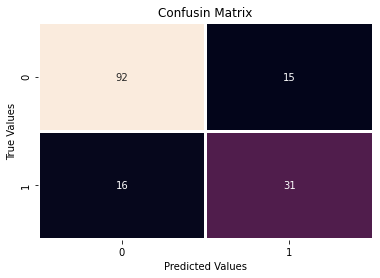

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)

## Karmaşıklık Matrisi
## Başarı Oranı
print(f"Training R^2 = {knn.score(X_train,y_train).round(4)}")
print(f"Test R^2 = {accuracy_score(y_test, y_pred1).round(4)}")
print(classification_report(y_test, y_pred1))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,lw=2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusin Matrix")
plt.show()

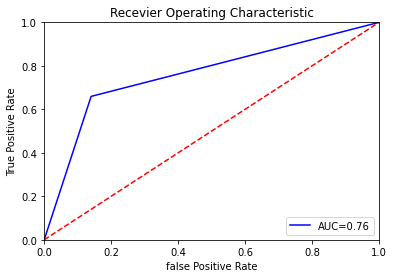

In [22]:
import sklearn.metrics as metrics 
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred1)
roc_auc =metrics.auc(fpr,tpr)
plt.title("Recevier Operating Characteristic")
plt.plot(fpr,tpr,"b",label="AUC=%0.2f"%roc_auc)
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

## Classification SVC

Destek vektör makinesi (SVC), eğitim verilerindeki herhangi bir noktadan en uzak olan iki sınıf arasında bir karar sınırı bulan vektör uzayı tabanlı makine öğrenme yöntemidir.

Yüksek boyutlu uzaylarda, boyut sayısının örnem sayısından fazla olduğu durumlarda dahi etkilidir. Destek vektörlerinde eğitim noktalarının bir alt kümesini kullandığından, bellek kullanımı açısından verimlidir.

Training R^2 = 0.8094
Test R^2 = 0.8182
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       107
           1       0.73      0.64      0.68        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154



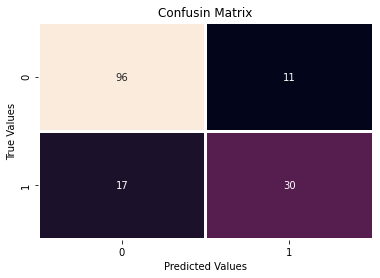

In [23]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#kernel ={‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train,y_train)
y_pred2 = svc.predict(X_test)

## Karmaşıklık Matrisi
## Başarı Oranı
print(f"Training R^2 = {svc.score(X_train,y_train).round(4)}")
print(f"Test R^2 = {accuracy_score(y_test, y_pred2).round(4)}")
print(classification_report(y_test, y_pred2))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,lw=2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusin Matrix")
plt.show()

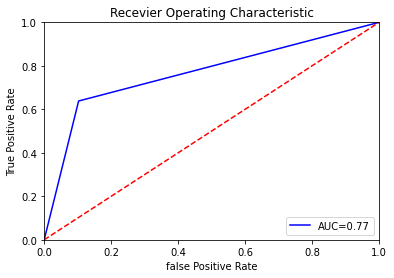

In [24]:
import sklearn.metrics as metrics 
probs = svc.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred2)
roc_auc =metrics.auc(fpr,tpr)
plt.title("Recevier Operating Characteristic")
plt.plot(fpr,tpr,"b",label="AUC=%0.2f"%roc_auc)
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

## Bernoulli Naive Bayes

Naive Bayes sınıflandırma algoritması, olasılık ilkelerine göre tanımlanmış bir dizi hesaplama ile, sisteme sunulan verilerin sınıfını yani kategorisini tespit etmeyi amaçlayan bir algoritmadır. 

Çok sınıflı kategorileri sınıflandırılmak için kullanılan Multinominal Naive Bayes yöntemine benzer şekilde işler, ancak ancak yalnızca ikili (boolean) tahminlerde bulunur.


Training R^2 = 0.728
Test R^2 = 0.7597
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       107
           1       0.62      0.53      0.57        47

    accuracy                           0.76       154
   macro avg       0.72      0.70      0.70       154
weighted avg       0.75      0.76      0.75       154



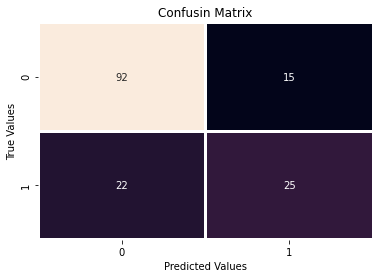

In [25]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)

## Karmaşıklık Matrisi
## Başarı Oranı
print(f"Training R^2 = {bnb.score(X_train,y_train).round(4)}")
print(f"Test R^2 = {accuracy_score(y_test, y_pred3).round(4)}")
print(classification_report(y_test, y_pred3))
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,lw=2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusin Matrix")
plt.show()

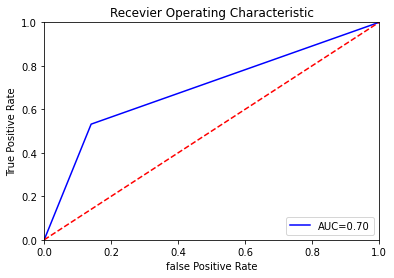

In [26]:
import sklearn.metrics as metrics 
probs = bnb.predict_proba(X_test)
preds = probs[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test,y_pred3)
roc_auc =metrics.auc(fpr,tpr)
plt.title("Recevier Operating Characteristic")
plt.plot(fpr,tpr,"b",label="AUC=%0.2f"%roc_auc)
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("false Positive Rate")
plt.show()

## Hiperparametre Optimizasyonu
Hiperparametre optimizasyonu, bir makine öğrenmesi algoritması için belirlenen başarı metriğine göre en uygun hiperparametre kombinasyonunu bulma işlemidir.
- Hiperparametre optimizasyonu ile model karmaşıklığı dengelenerek overfitting ve underfitting dengesi sağlanabilir.

 Hiperparametre yöntemlerinden GridSearchCV kullanılmıştır.
- Modelde denenmesi istenen hiperparametreler ve değerleri için bütün kombinasyonlar ile ayrı ayrı model kurulur ve belirtilen metriğe göre en başarılı hiperparametre seti belirlenir.
- (+) Tüm kombinasyonları denendiği için en iyi performans gösteren hiperparametre setini belirlemeyi garanti eder. Küçük veri setlerinde ve sadece birkaç tane hiperparametre denenmek istendiğinde çok iyi çalışır.
- (-) Büyük bir veri seti ile çalışıldığında ya da denenecek olan hiperparametre sayısı ve değeri arttırıldığında kombinasyon sayısı da katlanarak artacaktır. Kurulan her modelin cross-validation ile test edildiği de düşünüldüğünde maaliyet korkunç derecede artacaktır bu sebeple alternatif olarak RandomSearchCV yöntemi tercih edilebilir.

## Model Tuning 1 - Nearest Neighbors Classification

In [27]:
svr_params1 = { 'n_neighbors' : range(1,30),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
                'p': [1,2]}
svr_cv_model1 = GridSearchCV(KNeighborsClassifier(), svr_params1, scoring = 'accuracy',cv = 5)

In [28]:
svr_cv_model1.fit(X_train,y_train)
svr_cv_model1.best_params_

{'metric': 'minkowski', 'n_neighbors': 26, 'p': 1, 'weights': 'uniform'}

0.7769
0.8182
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       107
           1       0.77      0.57      0.66        47

    accuracy                           0.82       154
   macro avg       0.80      0.75      0.77       154
weighted avg       0.81      0.82      0.81       154



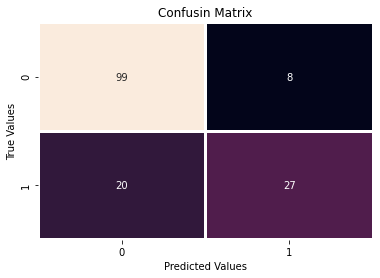

In [29]:
knn = KNeighborsClassifier(n_neighbors =26, weights="uniform",metric="minkowski",p=1 )
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)

## Karmaşıklık Matrisi
## Başarı Oranı
print(knn.score(X_train,y_train).round(4))
print(accuracy_score(y_test, y_pred1).round(4))
print(classification_report(y_test, y_pred1))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,lw=2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusin Matrix")
plt.show()

## Model Tuning 2 - Classification SVC

In [30]:
svr_params2 = {'C': [0.1, 1, 10, 50, 100], 
              'kernel': ['linear', 'rbf', 'poly'],
              'degree': [0, 1, 2, 3, 4, 5, 6],
              'gamma': ['scale', 'auto']}
svr_cv_model2 = GridSearchCV(SVC(), svr_params2, scoring = 'accuracy',cv = 5)

In [31]:
svr_cv_model2.fit(X_train,y_train)
svr_cv_model2.best_params_

{'C': 0.1, 'degree': 0, 'gamma': 'scale', 'kernel': 'linear'}

0.757328990228013
0.8116883116883117
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



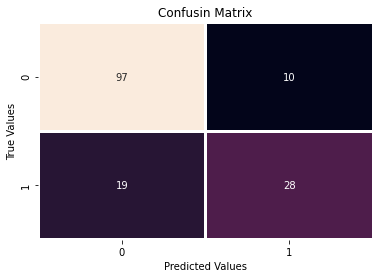

In [36]:
svc = SVC(C=0.1 , kernel="linear" , degree=0 , gamma="scale")
svc.fit(X_train,y_train)
print(svc.score(X_train,y_train))
y_pred2 = svc.predict(X_test)

## Karmaşıklık Matrisi
## Başarı Oranı
print(accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,lw=2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusin Matrix")
plt.show()

## Model Tuning 3 - Bernoulli Naive Bayes

In [33]:
svr_params3 = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

svr_cv_model3 = GridSearchCV(BernoulliNB(), svr_params3, scoring = 'accuracy',cv = 5)

In [34]:
svr_cv_model3.fit(X_train,y_train)
svr_cv_model3.best_params_

{'alpha': 0.01}

Training R^2 = 0.728
Test R^2 = 0.7597
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       107
           1       0.62      0.53      0.57        47

    accuracy                           0.76       154
   macro avg       0.72      0.70      0.70       154
weighted avg       0.75      0.76      0.75       154



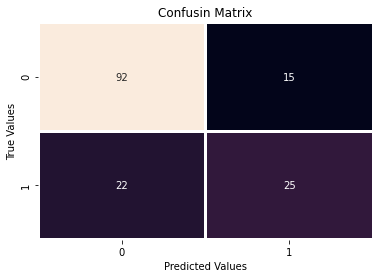

In [35]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(alpha=0.01)
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)

## Karmaşıklık Matrisi
## Başarı Oranı
print(f"Training R^2 = {bnb.score(X_train,y_train).round(4)}")
print(f"Test R^2 = {accuracy_score(y_test, y_pred3).round(4)}")
print(classification_report(y_test, y_pred3))
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,lw=2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusin Matrix")
plt.show()

Verilerimizi düzenleyerek üç farklı modelde kullandık.
Bu modellerde $R^{2}$ ve AUG değerlerine bakıldı. Model sıralaması aşağıda verilmiştir.

- Destek vektör makinesi (SVC)
    - Train $R^{2}$ = (0.809)
    - Test $R^{2}$ = (0.818)
    - AUG = (0.77)

- En Yakın Komşular
    - Train $R^{2}$ = (0.829)
    - Test $R^{2}$ = (0.798)
    - AUG = (0.76)
    
- Bernoulli Naive Bayes
    - Train $R^{2}$ = (0.728)
    - Test $R^{2}$ = (0.759)
    - AUG = (0.70)

Bu sonuçlar neticesinde SVC modelimizin en iyi model olduğu sonucuna ulaştık. Lakin her model için model optimizasyonu yaptık. Bunun sonucundaki değerler ise aşağıda verilmiştir.

- En Yakın Komşular
    - Train $R^{2}$ = (0.776)
    - Test $R^{2}$ = (0.818)

- Destek vektör makinesi (SVC)
    - Train $R^{2}$ = (0.757)
    - Test $R^{2}$ = (0.811)
    
- Bernoulli Naive Bayes
    - Train $R^{2}$ = (0.728)
    - Test $R^{2}$ = (0.759)
    
Model optimizasyon sonuçları neticesinde en iyi modelin  En Yakın Komşular modeli olduğuna karar verilmiştir.